## **Códigos en Python**

Escribe en Python un codigo que obtenga la factorización *LU* otro que obtenga la factorizacion *PLU* y otro que obtenga la
factorizacion de Cholesky de una matriz *A*. En caso de que la factorizacion no pueda realizarse sobre la matriz *A* tu codigo 
debe arrojar que es lo que la matriz *A* no cumple.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class InvalidInputMatrix(Exception):
    def __init__(self, message):
        super().__init__(message)

In [3]:
def lu_fact(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    LU decomposition of a square matrix A. 
    Matrix A must not contain any zero in the diagonal and must be invertible.

    Example
    --------
    >>> A = np.array([[3, 1, 1], [-3, -3, 1], [3, -3, 6]])
    >>> lu_fact(A)
    (array([[ 1.,  0.,  0.],
            [-1.,  1.,  0.],
            [ 1.,  2.,  1.]]), 
    array([[ 3,  1,  1],
          [ 0, -2,  2],
          [ 0,  0,  1]]))

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    U (ndarray) : Upper triangular matrix
    L (ndarray) : Lower triangular matrix
    """
    if np.linalg.det(A) == 0:
        raise InvalidInputMatrix('The matrix must be invertible.')
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix must be square.')
    if np.any(np.diag(A) == 0):
        raise InvalidInputMatrix('The matrix must not contain any zero in the diagonal.')
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return L, U

In [4]:
def swap_rows(A: np.ndarray, i: int, j: int) -> None:
    """ 
    Swap rows i and j in matrix A.
    """
    temp = np.copy(A[i])
    A[i] = A[j]
    A[j] = temp

In [5]:
def plu_fact(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """ 
    PLU decomposition of a square matrix A

    Example
    --------
    >>> A = np.array([[0., -1., 4.], [2., 1., 1.], [1., 1., -2.]])
    >>> plu_fact(A)
    (array([[ 0. , 1. , 0.],
            [ 1. , 0. , 0.],
            [ 0. , 0. , 1.]]),
    array([[ 1. ,  0. ,  0. ],
           [ 0. ,  1. ,  0. ],
           [ 0.5, -0.5,  1. ]]),
    array([[ 2. ,  1. ,  1. ],
           [ 0. , -1. ,  4. ],
           [ 0. ,  0. , -0.5]]))

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    P (ndarray) : Permutation matrix
    L (ndarray) : Lower triangular matrix
    U (ndarray) : Upper triangular matrix
    """
    if np.linalg.det(A) == 0:
        raise InvalidInputMatrix('The matrix must be invertible.')
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix must be square.')
    P = np.eye(n)
    L = np.zeros((n, n))
    U = np.copy(A)
    for j in range(n-1):
        if U[j,j] == 0:
            max_num = 0
            index = 0
            for k in range(j+1, n):
                if abs(U[k,j]) > max_num:
                    max_num = abs(U[k,j])
                    index = k
            swap_rows(U, j, index)
            swap_rows(P, j, index)
        for i in range(j+1,n):
            L[i,j] = (U[i,j])/(U[j,j])
            U[i] = U[i] - L[i,j]*U[j]
    L = L + np.eye(n)
    return P, L, U

In [6]:
def cholesky_fact(A: np.ndarray) -> np.ndarray:
    """ 
    Cholesky decomposition of a symmetric positive definite matrix A

    Example
    --------
    >>> A = np.array([[4., -1., 1.], [-1., 4.25, 2.75], [1., 2.75, 3.5]])
    >>> cholesky_fact(A)
    array([[ 2. , -0.5,  0.5],
           [ 0. ,  2. ,  1.5],
           [ 0. ,  0. ,  1. ]])

    Parameters
    ----------
    A (ndarray) : nxn coefficient matrix

    Returns
    -------
    U (ndarray) : Upper triangular matrix
    """
    if np.linalg.det(A) == 0:
        raise InvalidInputMatrix('The matrix must be invertible.')
    m, n = np.shape(A)
    if m != n:
        raise InvalidInputMatrix('The matrix must be square.')
    if not np.allclose(A, A.T):
        raise InvalidInputMatrix('The matrix must be symmetric.')
    x = np.ones(n)
    if x.T @ A @ x <= 0:
        raise InvalidInputMatrix('The matrix must be positive definite.')
    U = np.copy(A)
    for i in range(n):
        for j in range(i+1, n):
            U[j] = U[j] - U[i]*U[j,i]/U[i,i]
        U[i] = U[i]/np.sqrt(U[i,i])
    return U

## **Error en la factorización**

Se define el error en la factorización LU como

$$ ||A-LU|| $$

para la factorización PLU como

$$ ||PA-LU|| $$

y para la factorización de Cholesky como

$$ || A-U^TU || $$

In [7]:
def lu_error(A: np.ndarray, L: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of LU decomposition
    """
    return np.linalg.norm(A - L @ U)

In [8]:
def plu_error(A: np.ndarray, P: np.ndarray, L: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of PLU decomposition
    """
    return np.linalg.norm(P @ A - L @ U)

In [9]:
def cholesky_error(A: np.ndarray, U: np.ndarray) -> float:
    """ 
    Calculate the error of Cholesky decomposition
    """
    return np.linalg.norm(A - U.T @ U)

1. Considera un vector N con 50 entradas en orden ascendente, de tal forma que si $N=(n_1,...,n_{50})$, entonces $n_1=2, n_i-n_{i-1}=10$ y en consecuencia $n_{50} = 502$.

In [10]:
N = np.arange(2, 503, 10)
N

array([  2,  12,  22,  32,  42,  52,  62,  72,  82,  92, 102, 112, 122,
       132, 142, 152, 162, 172, 182, 192, 202, 212, 222, 232, 242, 252,
       262, 272, 282, 292, 302, 312, 322, 332, 342, 352, 362, 372, 382,
       392, 402, 412, 422, 432, 442, 452, 462, 472, 482, 492, 502])

2. Para cada $n_i$, crea una matriz $M_i$ de dimensiones $n \times n$, con valores aleatorios y calcula el error asociado a la factorización LU, PLU y Cholesky. Para Cholesky, en lugar de trabajar con las matrices $M_i$, trabaja con la matriz $N_i = M_i M^T_i$.

### LU

In [17]:
lu_errors = np.array([])
for n in N:
    scale = 25 # scale factor of the random matrix
    M = scale*np.random.rand(n,n)
    L, U = lu_fact(M)
    lu_errors = np.append(lu_errors, lu_error(M, L, U))

In [18]:
lu_errors

array([8.88178420e-16, 3.76997149e-14, 3.50736983e-13, 7.55387448e-12,
       2.45734294e-12, 1.29002911e-11, 7.99056029e-12, 4.59961556e-12,
       1.50464724e-11, 2.32718028e-11, 6.30262186e-11, 4.05593481e-11,
       3.21956379e-11, 6.74546631e-11, 4.95383489e-11, 9.90290421e-11,
       6.18487174e-11, 4.05387984e-10, 1.36028395e-10, 1.95138019e-10,
       1.98706626e-10, 1.12600630e-09, 4.44731556e-10, 7.65454708e-09,
       5.13534068e-10, 8.11935814e-10, 2.58343396e-10, 3.06072152e-10,
       2.92619759e-09, 1.32217714e-09, 4.88717752e-10, 5.72266194e-10,
       1.28044773e-09, 5.91838259e-10, 5.38784979e-10, 9.86934770e-10,
       6.71591891e-10, 1.62915679e-09, 8.00774042e-08, 7.78021523e-09,
       4.81486391e-09, 6.74429225e-10, 3.26779150e-09, 7.50682068e-10,
       9.86122355e-10, 1.11484089e-08, 2.99444864e-09, 1.29688980e-09,
       1.47189474e-09, 2.84942076e-09, 1.41658594e-09])

### PLU

In [13]:
plu_errors = np.array([])
for n in N:
    scale = 25 # scale factor of the random matrix
    M = scale*np.random.rand(n,n)
    P, L, U = plu_fact(M)
    plu_errors = np.append(plu_errors, plu_error(M, P, L, U))

In [14]:
plu_errors

array([1.77635684e-15, 6.76796363e-14, 1.92528827e-13, 1.23321408e-11,
       3.03900653e-12, 3.56024139e-12, 2.60483171e-10, 5.92968767e-12,
       2.84983931e-11, 1.04556044e-10, 1.12939604e-11, 4.09514224e-11,
       4.90649279e-11, 1.43181361e-11, 1.98863503e-11, 7.20099122e-11,
       2.26255000e-10, 5.57958429e-11, 2.21041333e-10, 1.43473401e-09,
       1.54748946e-10, 6.44790326e-10, 1.08703601e-10, 8.68085937e-11,
       9.91001545e-10, 3.13594259e-09, 2.38176388e-10, 1.20572973e-09,
       2.35627876e-10, 1.14696139e-09, 1.47411717e-09, 1.37356064e-09,
       7.50367470e-10, 8.57187050e-09, 1.98725925e-09, 5.87974091e-10,
       6.53530806e-10, 6.97636919e-10, 4.57098868e-09, 2.78215339e-09,
       1.37005666e-09, 3.48994147e-09, 2.09951768e-09, 2.34294644e-09,
       7.36206129e-08, 1.28285280e-09, 6.13439315e-10, 3.42592956e-09,
       3.02127407e-09, 1.54081302e-09, 1.86227926e-09])

### Cholesky

In [15]:
cholesky_errors = np.array([])
for n in N:
    scale = 25 # scale factor of the random matrix
    M = scale*np.random.rand(n,n)
    A = M @ M.T
    U = cholesky_fact(A)
    cholesky_errors = np.append(cholesky_errors, cholesky_error(A, U))

In [16]:
cholesky_errors

array([0.00000000e+00, 3.36097980e-12, 1.10270372e-11, 3.28678852e-11,
       5.81792323e-11, 8.61719233e-11, 1.41904492e-10, 1.97659795e-10,
       2.56567794e-10, 3.35331079e-10, 4.40255563e-10, 6.59904687e-10,
       8.07774671e-10, 9.47915154e-10, 1.05889559e-09, 1.22153231e-09,
       1.28935430e-09, 1.43167755e-09, 1.54011589e-09, 1.79931799e-09,
       2.18454493e-09, 2.97879162e-09, 3.65401605e-09, 4.24417902e-09,
       4.59202569e-09, 4.84562390e-09, 5.24608654e-09, 5.56070267e-09,
       5.79247572e-09, 6.16937709e-09, 6.40904493e-09, 6.83246126e-09,
       7.50634844e-09, 7.81677972e-09, 7.72651887e-09, 8.37679518e-09,
       8.50725612e-09, 8.84672373e-09, 9.49643204e-09, 9.79713569e-09,
       1.10421329e-08, 1.24586195e-08, 1.55272004e-08, 1.76290612e-08,
       1.96406548e-08, 2.12816599e-08, 2.23614315e-08, 2.33214203e-08,
       2.40806389e-08, 2.46478904e-08, 2.59189178e-08])

Grafica el error de las factorizaciones en funcion de la dimensión. No olvides poner etiquetas a tus gráficas y nombrar a los ejes.

In [19]:
import matplotlib.pyplot as plt

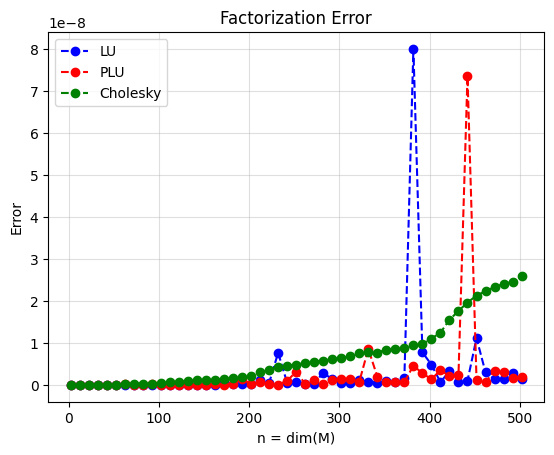

In [21]:
plt.plot(N, lu_errors, 'b--o', label='LU')
plt.plot(N, plu_errors, 'r--o', label='PLU')
plt.plot(N, cholesky_errors, 'g--o', label='Cholesky')
plt.xlabel('n = dim(M)')
plt.ylabel('Error')
plt.title('Factorization Error')
plt.grid(alpha=0.4)
plt.legend()
plt.show()

## **Estabilidad en la factorización PLU**